  # TITANIC SURVIVAL PREDICTION
  
 ## 1. Introduction
The Titanic dataset is a classic dataset in data science and machine learning, containing information about passengers aboard the RMS Titanic during its tragic sinking in 1912.
It includes details such as age, sex, passenger class, fare, and whether each passenger survived.  

The main goal of this project is to build a **predictive model that can determine the likelihood of survival** based on passenger information. 
In addition, we will explore the data to identify the key factors that influenced survival outcomes.   

**Dataset**: [Titanic dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv)
  


In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#LOADING THE DATASET
df=pd.read_csv('Titanic.csv')


In [3]:
#GETTING AN OVERVIEW OF THE DATASET
print("Shape of the dataset",df.shape)
df.head()

Shape of the dataset (891, 10)


,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
#GETTING INFORMATION ABOUT THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


 # DEFINING THE COLUMNS

**sex** → Gender of the passenger (male/female).

**age** → Age of the passenger in years.

**sibsp** → Number of siblings or spouses aboard the ship.

**parch** → Number of parents or children aboard the ship.

**fare** → Ticket price paid by the passenger.

**embarked** → Port where the passenger boarded (e.g., C = Cherbourg, Q = Queenstown, S = Southampton).

**class** → Passenger class (1st, 2nd, 3rd).

**who** → General category of passenger (man, woman, child).

**alone** → Whether the passenger was traveling alone (True/False).

**survived**→ Target variable; indicates if the passenger survived (1) or not (0).

In [5]:
#CHECKING FOR NULL VALLUES
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [6]:
#DESCRIPTIVE STATISTICS
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


# EXPLORATORY DATA ANALYSIS


<function matplotlib.pyplot.show(close=None, block=None)>

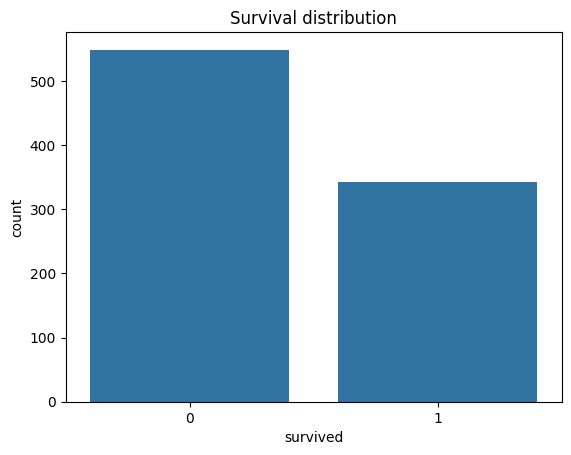

In [7]:
#SURVIVAL COUNTS
sns.countplot(x='survived',data=df)
plt.title("Survival distribution")
plt.show

**where(1)=survived **and** (0)=not survived**

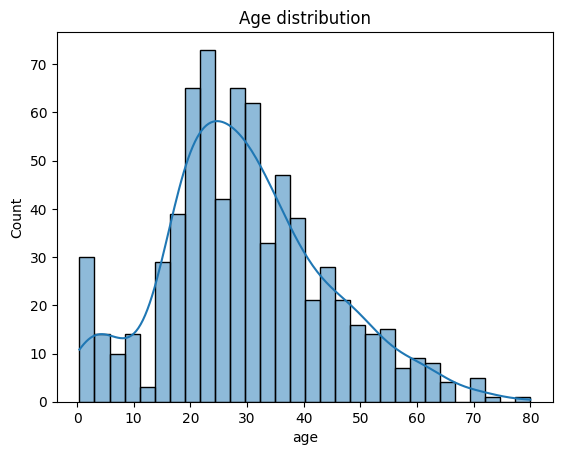

In [8]:
#AGE DISTRIBUTION
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title("Age distribution")
plt.show()

- **Younger passengers had better odds of survival.**

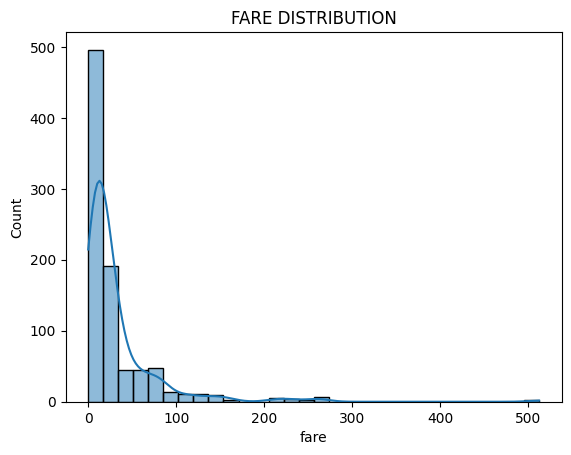

In [9]:
#FARE DISTRIBUTION
sns.histplot(df['fare'], kde=True, bins=30)
plt.title("FARE DISTRIBUTION")
plt.show()

 - **Higher fare correlated with survival.**

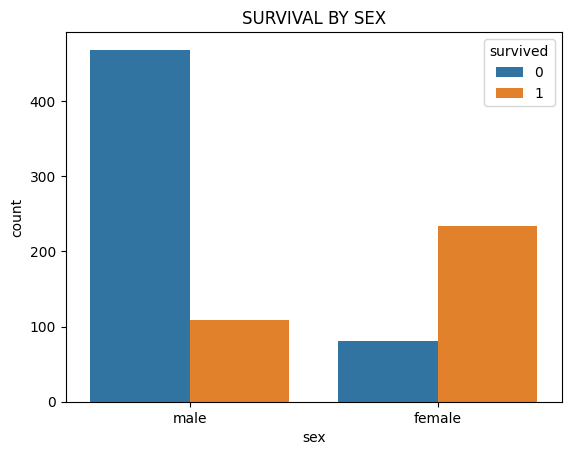

In [10]:
#SURVIVAL BY SEX
sns.countplot(x='sex',hue='survived', data=df)
plt.title("SURVIVAL BY SEX")
plt.show()

 - **Females had higher survival rates.**

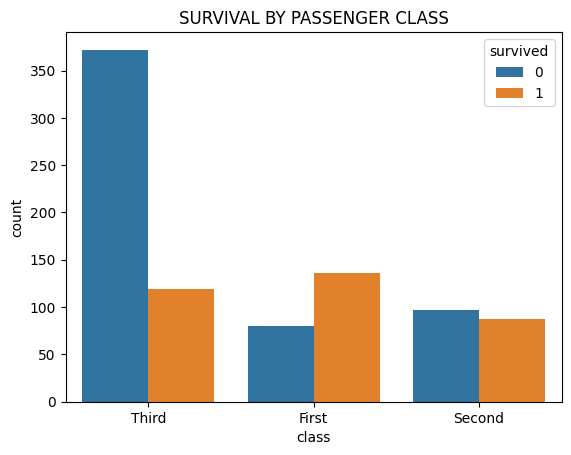

In [11]:
#SURVIVAL BY PASSENGER CLASS
sns.countplot(x='class',hue='survived', data=df)
plt.title("SURVIVAL BY PASSENGER CLASS")
plt.show()

- **Higher-class passengers survived more often.**

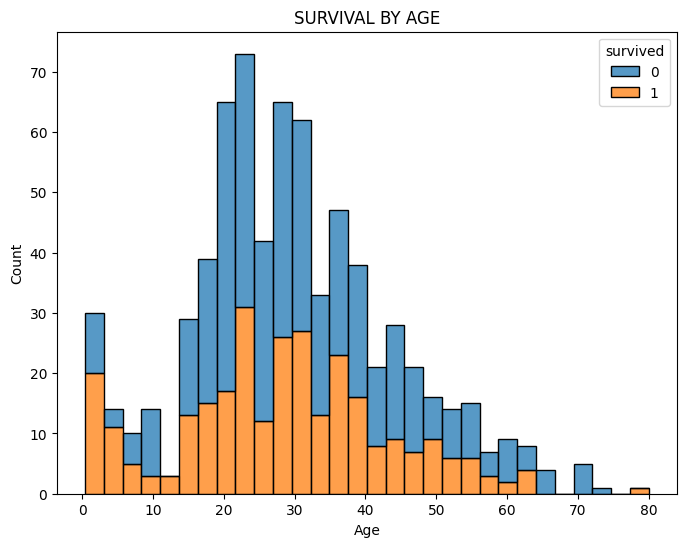

In [12]:
#SURVIVAL BY AGE
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="age", hue="survived", bins=30, multiple="stack")
plt.title("SURVIVAL BY AGE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


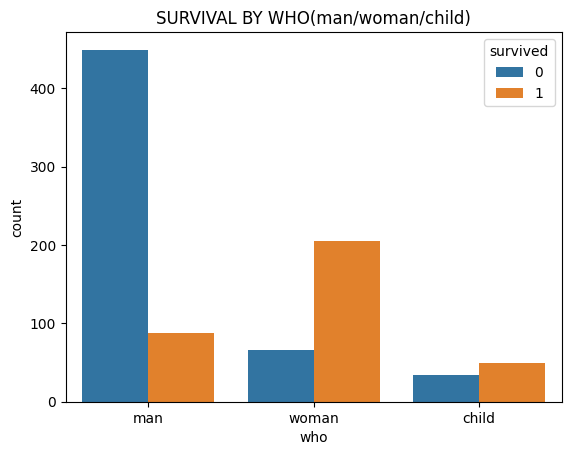

In [13]:
#SURVIVAL BY WHO(man/woman/child)
sns.countplot(x='who',hue='survived', data=df)
plt.title("SURVIVAL BY WHO(man/woman/child)")
plt.show()

In [14]:
#CORRRELATION 
df.corr(numeric_only=True)

,age,sibsp,parch,fare,alone,survived
age,1.000000,-0.308247,-0.189119,0.096067,0.198270,-0.077221
sibsp,-0.308247,1.000000,0.414838,0.159651,-0.584471,-0.035322
parch,-0.189119,0.414838,1.000000,0.216225,-0.583398,0.081629
fare,0.096067,0.159651,0.216225,1.000000,-0.271832,0.257307
alone,0.198270,-0.584471,-0.583398,-0.271832,1.000000,-0.203367
survived,-0.077221,-0.035322,0.081629,0.257307,-0.203367,1.000000


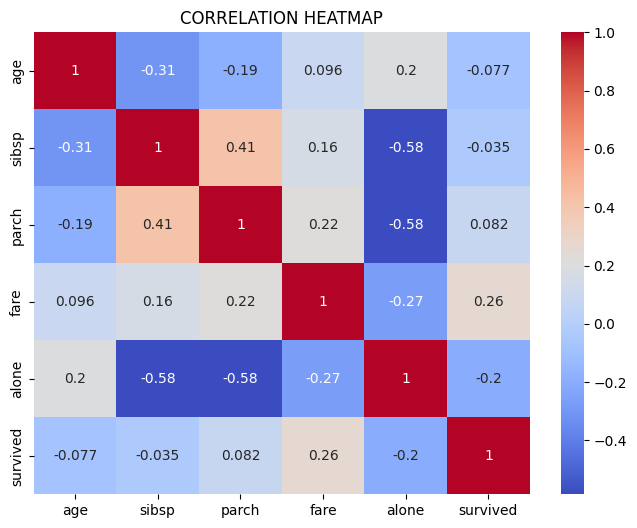

In [15]:
#CORRELATION HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()

# DATA  CLEANING/PREPROCESSING 
- **Missing values**: filled `Age`, `Embarked`.  


In [16]:
#HANDLING MISSING VALUES
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


C:\Users\Win\AppData\Local\Temp\ipykernel_11336\1413399161.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Win\AppData\Local\Temp\ipykernel_11336\1413399161.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [17]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

# ENCODING
- **Encoding**: converted categorical variables (`Sex`, `Pclass`, `Embarked`).   


In [18]:
#importing labelEncoder
from sklearn.preprocessing import LabelEncoder


In [19]:
#copying the dataset to avoid messing the original 
data=df.copy()

In [20]:
data.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [21]:
#one-hot encoding multi-category columns
data=pd.get_dummies(df, columns=['embarked', 'class'], drop_first=True)

In [22]:
data.head()

,sex,age,sibsp,parch,fare,who,alone,survived,embarked_Q,embarked_S,class_Second,class_Third
0,male,22.0,1,0,7.2500,man,False,0,False,True,False,True
1,female,38.0,1,0,71.2833,woman,False,1,False,False,False,False
2,female,26.0,0,0,7.9250,woman,True,1,False,True,False,True
3,female,35.0,1,0,53.1000,woman,False,1,False,True,False,False
4,male,35.0,0,0,8.0500,man,True,0,False,True,False,True


In [23]:
bool_cols = [ 'embarked_Q', 'embarked_S',
             'class_Second', 'class_Third']
for col in bool_cols:
    data[col] = data[col].astype(int)

In [24]:
#label encoding binary columns
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['alone']=le.fit_transform(data['alone'])
data['who'] = le.fit_transform(data['who'])

In [25]:
data.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'who', 'alone', 'survived',
       'embarked_Q', 'embarked_S', 'class_Second', 'class_Third'],
      dtype='object')

In [26]:
data.head()

,sex,age,sibsp,parch,fare,who,alone,survived,embarked_Q,embarked_S,class_Second,class_Third
0,1,22.0,1,0,7.2500,1,0,0,0,1,0,1
1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0
2,0,26.0,0,0,7.9250,2,1,1,0,1,0,1
3,0,35.0,1,0,53.1000,2,0,1,0,1,0,0
4,1,35.0,0,0,8.0500,1,1,0,0,1,0,1


# FEATURE ENGINEERING:  
  - `family_size = SibSp + Parch + 1`
  - `is_child = Age < 16`  
  - `fare_per_person = Fare / family_size` 

In [27]:
#FAMILY SIZE
data['family_size']=data['sibsp']+data['parch']+1

In [28]:
#IS CHILD/ADULT
data['is_child']=(data['age']<16).astype(int)

In [29]:
#FARE PER PERSON
data['fare_per_person']=data['fare']/data['family_size']

In [30]:
data.head()

,sex,age,sibsp,parch,fare,who,alone,survived,embarked_Q,embarked_S,class_Second,class_Third,family_size,is_child,fare_per_person
0,1,22.0,1,0,7.2500,1,0,0,0,1,0,1,2,0,3.62500
1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,2,0,35.64165
2,0,26.0,0,0,7.9250,2,1,1,0,1,0,1,1,0,7.92500
3,0,35.0,1,0,53.1000,2,0,1,0,1,0,0,2,0,26.55000
4,1,35.0,0,0,8.0500,1,1,0,0,1,0,1,1,0,8.05000


# TRAIN/TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#separate features (X) and target(Y)
X=data.drop('survived',axis=1)
Y=data['survived']

In [33]:
#splitting the data into training and testing sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print("Train set size:",X_train.shape)
print("Test set size:",X_test.shape)

Train set size: (712, 14)
Test set size: (179, 14)


# MODELLING
# a. Regression


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
#initializing the model
model=LogisticRegression(max_iter=1000)


In [36]:
#Training the model
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [37]:
#Making predictions
Y_pred=model.predict(X_test)

In [38]:
#Evaluation
print("Accuracy:",accuracy_score(Y_test,Y_pred)*100)
print("\nConfusion Matrix :\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test,Y_pred))

Accuracy: 82.12290502793296

Confusion Matrix :
 [[99 11]
 [21 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# b. Random Forest 

In [39]:
#RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)


In [40]:
#MODEL TARINING
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [41]:
#making predictions
Y_pred_rf=rf_model.predict(X_test)

In [42]:
#evaluation
print("Accuracy:",accuracy_score(Y_test,Y_pred_rf)*100)


Accuracy: 79.88826815642457


In [43]:
print("\nConfusion Matrix:\n",confusion_matrix(Y_test,Y_pred_rf))


Confusion Matrix:
 [[100  10]
 [ 26  43]]


In [44]:
print("\nClassification Report:\n",classification_report(Y_test,Y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       110
           1       0.81      0.62      0.70        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# FEATURE IMPORTANCE
- Feature importance highlights that **social/demographic factors (Sex, Class, Fare)** were the strongest predictors.  


In [45]:
#feature importance
feat_importance=pd.DataFrame({'Feature':X_train.columns,'Importance':rf_model.feature_importances_}).sort_values(by='Importance',ascending=False)
print("\nFeatureImportance:\n",feat_importance)


FeatureImportance:
             Feature  Importance
0               sex    0.274536
5               who    0.217673
13  fare_per_person    0.111338
4              fare    0.103686
1               age    0.074982
10      class_Third    0.072522
11      family_size    0.042297
2             sibsp    0.027286
12         is_child    0.018698
3             parch    0.015087
8        embarked_S    0.014244
9      class_Second    0.011131
6             alone    0.010198
7        embarked_Q    0.006323


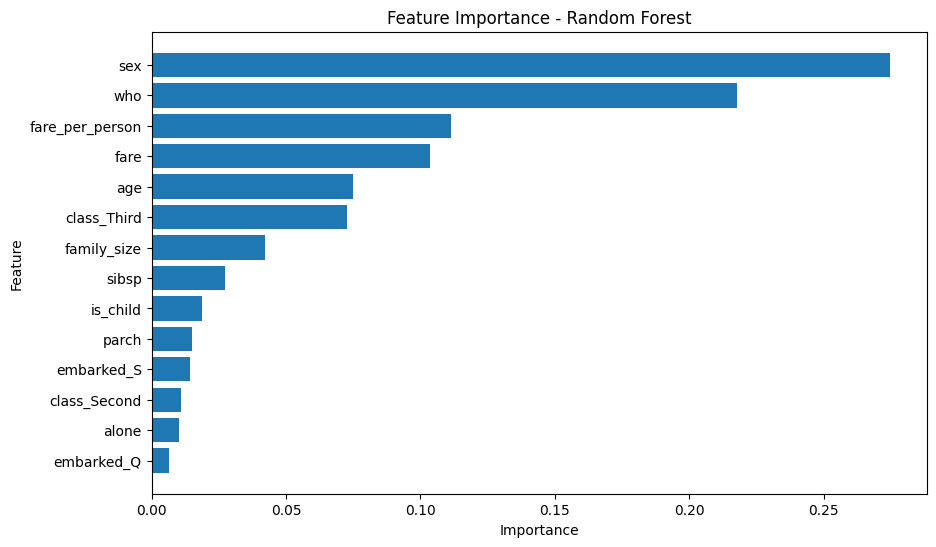

In [46]:
# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()  # most important at top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


# HYPERPARAMETER TUNING

In [47]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=42)

In [48]:
#Defining hyperparmeter grid
param_grid={
    'n_estimators':[100,200,300],
'max_depth':[None,5,10,20],
'min_samples_split':[2,5,10],
'min_samples_leaf':[1,2,4],
'max_features':['sqrt','log2']}

In [49]:
#Settting GridSearchCV
grid_search=GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,verbose=2,scoring='accuracy'    
)


In [50]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [51]:
#best parameters
print("Best Paranmeters:",grid_search.best_params_)
print("Best Cross-Validation Accuracy:",grid_search.best_score_)



Best Paranmeters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8329853245346204


In [52]:
#Evaluation on the test data
best_rf=grid_search.best_estimator_
test_accuracy=best_rf.score(X_test,Y_test)
print("Test Accuracy:",(test_accuracy)*100)

Test Accuracy: 81.56424581005587


## ROC Curve-Random Forest

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score


In [54]:
# Predict probabilities for the positive class (survived = 1)
Y_proba = best_rf.predict_proba(X_test)[:, 1]


In [57]:
# Get False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba)

# AUC score
auc_score = roc_auc_score(Y_test, Y_proba)
print("ROC AUC Score:", auc_score)


ROC AUC Score: 0.8325428194993413


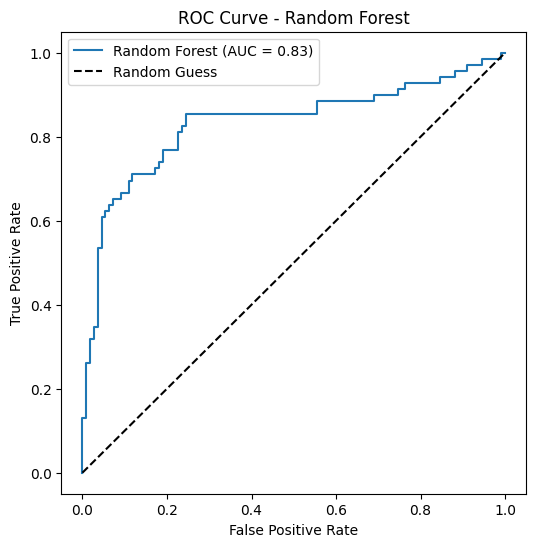

In [58]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


## Precision-Recall Curve-Random Forest

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score


In [60]:
# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)

In [61]:
# Average precision score (summary metric, similar to AUC)
ap_score = average_precision_score(Y_test, Y_proba)
print("Average Precision Score:", ap_score)

Average Precision Score: 0.8094001954720079


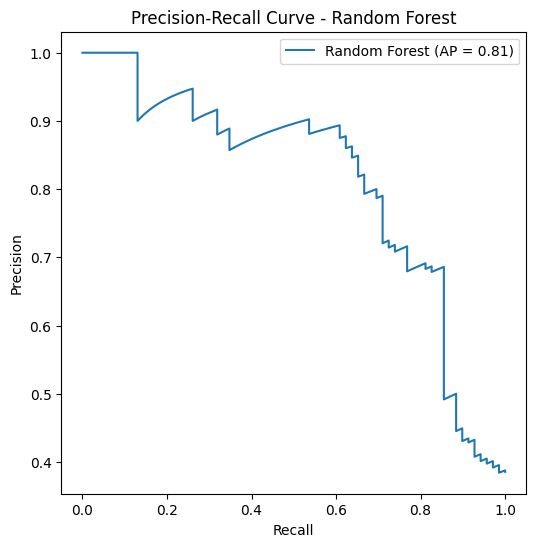

In [62]:
# Plot
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f"Random Forest (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend()
plt.show()

# Comparing tuned Random Forest vs Logistic Regression using:

In [63]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [64]:
# Fit on training data
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [65]:
#Logistic Regression probabilities
Y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

In [66]:
# Random Forest (best tuned) probabilities
Y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# a.ROC–AUC curves


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [68]:
# Compute ROC
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_proba_rf)

In [69]:

auc_lr = roc_auc_score(Y_test, Y_proba_lr)
auc_rf = roc_auc_score(Y_test, Y_proba_rf)

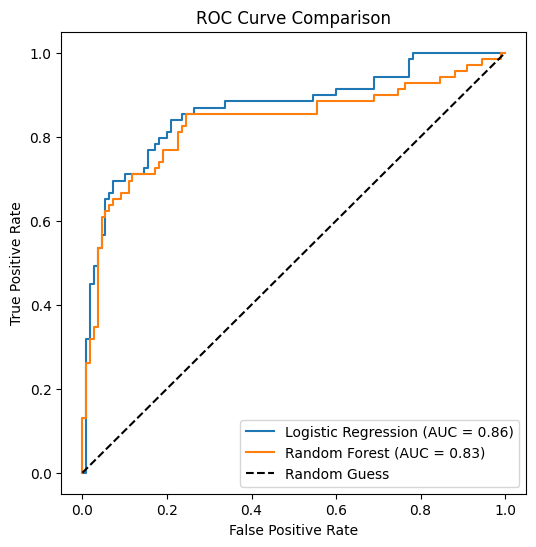

In [70]:
plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# b.Precision–Recall curves

In [71]:
prec_lr, rec_lr, _ = precision_recall_curve(Y_test, Y_proba_lr)
prec_rf, rec_rf, _ = precision_recall_curve(Y_test, Y_proba_rf)

In [72]:
ap_lr = average_precision_score(Y_test, Y_proba_lr)
ap_rf = average_precision_score(Y_test, Y_proba_rf)

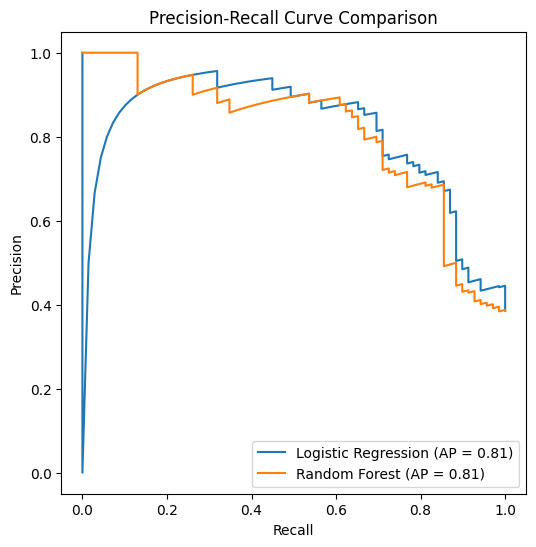

In [73]:
plt.figure(figsize=(6,6))
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP = {ap_lr:.2f})")
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP = {ap_rf:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()


In [74]:
# Get accuracy for both models
acc_lr = accuracy_score(Y_test, log_reg.predict(X_test))
acc_rf = accuracy_score(Y_test, best_rf.predict(X_test))

In [75]:
# summary table
results = {
    "Model": ["Logistic Regression", "Random Forest (Tuned)"],
    "Accuracy": [acc_lr, acc_rf],
    "ROC-AUC": [auc_lr, auc_rf],
    "Avg Precision (PR)": [ap_lr, ap_rf]
}



In [76]:
results_df = pd.DataFrame(results)
print(results_df)


                   Model  Accuracy   ROC-AUC  Avg Precision (PR)
0    Logistic Regression  0.821229  0.864822            0.809161
1  Random Forest (Tuned)  0.815642  0.832543            0.809400


##  Evaluation  

- Logistic Regression outperformed Random Forest in Accuracy and ROC-AUC, showing it’s a strong baseline model.

- Random Forest (Tuned) performed similarly but didn’t significantly improve results — though it had a slightly higher average precision.


##  Insights  
- Survival chances were not random , **social structure mattered**.  
- “**Women and children first**” reflected in the data (Sex, Age).  
- **Wealth** and **class** influenced survival (Pclass, Fare).  
- **Family size** had non-linear effects (too large → harder survival).  





## Conclusion  
- Best model: **Logistic Regression**.  
- Accuracy: ~83% | ROC-AUC: ~0.86  
- This notebook demonstrates a full **data science pipeline**:  
  - Data cleaning → Feature engineering → Modeling → Tuning → Evaluation → Insights.  



##  Next Steps  
- Test advanced models (XGBoost, Gradient Boosting).  
- Deploy model via Streamlit/Flask app for interactive predictions.  
- Use SHAP values for deeper feature interpretability.  
